# Image Classification with CNN on MNIST

Recognize handwritten digits in the MNIST dataset and evaluate the model's performance.

## Data Description
- MNIST dataset consisting of grayscale images of handwritten digits (0-9).

## Model Overview
- CNN architecture with convolutional and fully connected layers.

## Training Procedure
- Splitting data into training and testing sets.
- Training the model on the training set and evaluating on the test set.

Let's get started!


In [14]:
!pip install torchmetrics


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Accuracy, Precision, Recall
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score



*    converts images from the MNIST dataset into PyTorch tensors and then download  MNIST dataset.




In [16]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Write some code to know the information about your data

In [17]:
dataset_size = len(train_dataset)
print("Size of the entire dataset:", dataset_size)

Size of the entire dataset: 60000


*  the number above is number of images




In [18]:
first_image = train_dataset[0][0].shape
print("Shape of a single data point:", first_image)

Shape of a single data point: torch.Size([1, 28, 28])




*   The first dimension (1) represents the number of channels.
*   The second dimension (28) corresponds to the height of the image.
*   The third dimension (28) corresponds to the width of the image.:









loaders efficiently load and provide batches of data during the training and testing phases of a neural network.

In [19]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader =  DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

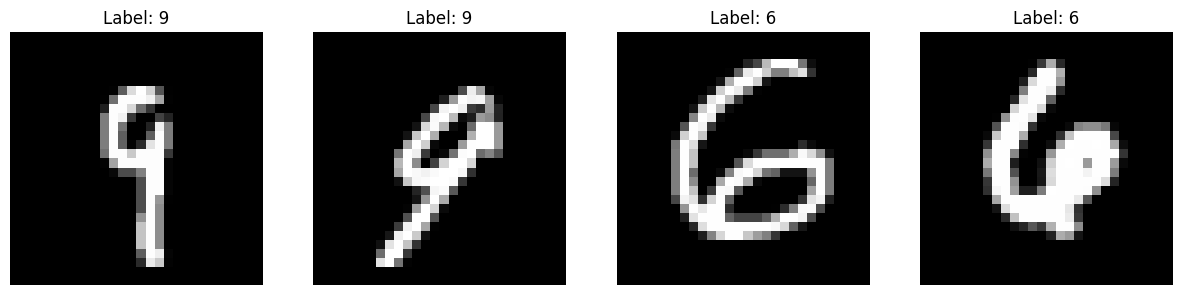

In [20]:
#show some of images from the data
for images, labels in train_loader:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    for idx in range(4):
        axes[idx].imshow(images[idx].squeeze().numpy(), cmap='gray')
        axes[idx].axis('off')
        axes[idx].set_title(f'Label: {labels[idx].item()}')
    plt.show()
    break

# Defining the Convolutional Neural Network

In [21]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )

        self.classifier = nn.Linear(in_features=64 * 7 * 7, out_features=num_classes)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x


num_classes = 10
your_cnn = CNN(num_classes)

print(your_cnn)


CNN(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ELU(alpha=1.0)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ELU(alpha=1.0)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Linear(in_features=3136, out_features=10, bias=True)
)


# Training the CNN

In [24]:
def train_model(optimizer, net, num_epochs):
    num_processed = 0
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        running_loss = 0
        num_processed = 0
        for features, labels in train_loader:
            optimizer.zero_grad()
            outputs = net(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            num_processed += len(labels)
        print(f'epoch {epoch}, loss: {running_loss / num_processed}')

    train_loss = running_loss / len(train_loader)

net = CNN(num_classes)
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=5,
)


epoch 0, loss: 0.004503149253389954
epoch 1, loss: 0.0016686253464989326
epoch 2, loss: 0.0012737755285884
epoch 3, loss: 0.001037742068260862
epoch 4, loss: 0.0008250852113877954


# Testing the CNN

In [23]:
net.eval()
predicted = []
true_labels = []

for i, (features, label) in enumerate(test_dataset):
    output = net.forward(features.reshape(-1, 1, 28, 28))
    cat = torch.argmax(output, dim=-1)
    predicted.append(cat.item())
    true_labels.append(label)

accuracy = accuracy_score(true_labels, predicted)
precision = precision_score(true_labels, predicted, average=None)
recall = recall_score(true_labels, predicted, average=None)

print('Accuracy: {:.2%}'.format(accuracy))
print('Precision (per class):', precision)
print('Recall (per class):', recall)



Accuracy: 98.27%
Precision (per class): [0.98274112 0.9955157  0.98346304 0.98422091 0.99179487 0.97888889
 0.99055614 0.99007937 0.95427435 0.97440945]
Recall (per class): [0.9877551  0.97797357 0.97965116 0.98811881 0.98472505 0.98766816
 0.98538622 0.97081712 0.98562628 0.98116947]


## Conclusion

In this notebook, we implemented and trained a convolutional neural network (CNN) on the MNIST dataset. The model achieved an impressive accuracy of 98.27% on the test set. The precision and recall scores per class demonstrate the model's effectiveness in recognizing various digits

Thank you for following along!